### Problem Statement:

We have to find out whether there is any pattern or significant relation between the spending time on the website and Buying done by a customer. The Data has been given below. Find out if the No of Items Purchased are related to the Time Spent on the Website with 99% Certainty


### Defining Null Hypothesis
H0: There is no relation between the Time Spent on Website and the Purchase by a Buyer/Visitor.

### Defining Alternate Hypothesis
H0: There is a significant relation between the Time Spent on Website and the Purchase by a Buyer/Visitor.

### Choose Alpha
Since, the Level of Significance given is 99% and hence alpha (max error = 1- LOS) which is 0.01.

In [0]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [0]:
time = ["0 to 10 Mins", "10 to 20 Mins", "More than 20 Mins"]
data = {"Zero":[1000, 1500, 500], "One":[900, 2600, 2500], "Two":[100, 500, 400]}

In [0]:
obs = pd.DataFrame(data, index = time)

In [0]:
obs.columns

Index(['Zero', 'One', 'Two'], dtype='object')

In [0]:
tstats,pvalue,df,exp_count = stats.chi2_contingency(observed=obs)

In [0]:
print("Test Statistic:", tstats)
print("PValue:", pvalue)
print("Degrees of Freedom:", df)

Test Statistic: 794.2668371696506
PValue: 1.3402208259188017e-170
Degrees of Freedom: 4


In [0]:
pd.DataFrame(exp_count, columns = obs.columns)

,Zero,One,Two
0,600.0,1200.0,200.0
1,1380.0,2760.0,460.0
2,1020.0,2040.0,340.0


In [0]:
# Finding Chi Square Critical Value
from scipy.stats import chi2
prob_value = 0.99
df = 4
value = chi2.ppf(prob_value, df)
print(value)
print(chi2.cdf(value, df))

13.276704135987622
0.99


In [0]:
# Calculate Inference
def inference(crit, tstats):
  if(tstats>crit):
    return("Attributes are NOT Independent")
  else:
    return("Attributes ARE Independent")

In [0]:
inference(value, tstats)

'Attributes are NOT Independent'

In [0]:
def chisquaretest(df):
  # Finding Test Statistic
  import scipy.stats as stats
  tstats, pvalue, df, exp_count = stats.chi2_contingency(observed = df)
  print("Test Statistics: ", tstats.round(3))
  print("PValue: ", pvalue)
  print("Degrees of Freedom: ", df)
  print("Expected Values: ", exp_count)

  # Finding Critical Values
  from scipy.stats import chi2
  value = chi2.ppf(0.99, df)
  print("Chi Square Critical Value: ", value)
  print("The LOS is: ", chi2.cdf(value, df), "And Alpha is: ",(1-chi2.cdf(value, df)))

  # Finding Inference
  if(tstats>value):
    print("Attributes are NOT Independent")
  else:
    print("Attributes are Independent")

In [0]:
chisquaretest(obs)

Test Statistics:  794.267
PValue:  1.3402208259188017e-170
Degrees of Freedom:  4
Expected Values:  [[ 600. 1200.  200.]
 [1380. 2760.  460.]
 [1020. 2040.  340.]]
Chi Square Critical Value:  13.276704135987622
The LOS is:  0.99 And Alpha is:  0.010000000000000009
Attributes are NOT Independent


## Conclusion

1. Basis P Value

Since, it is found that the PValue is less than 0.05, hence the relation between the Time Spent Vs the Purchase is significantly related to each other

2. Basis Critical Value and Test Statistic

Since, the Test Statistic is 794.26 and the Critical Value is 13.27 it means that the Test Statistic lies in the Rejection Region and hence, we reject the H0 meaning that the Attributes are not Related. The test proves that both the Attributes are Related.

# Binomial Probability Distribution
An Experiment is Binomial Experiement if it satisfies three conditions:

1. The no of Trials or Observations are Fixed.

2. Each Observation or Trial is Independent. For e.g. tossing the coin first time and then second time. Customers purchasing online.

3. There should be two possible outcomes. E.g. Head or Tails or Buy & Not Buy

4. The Probability of Success remains same for each trial. For e.g. Prob(H) will be same as Prob(T)

#### Real Life Examples

1. Drug Testing - Whether the drug works or it doesnt.
2. Buying Lottery - Either you win or loose
3. Online Shopping - Buy or Not Buy
4. Credit Card - Default Payments or not

Y is the number of flights sold per hour by an online travel agency. This travel agency usually sells 10 flights per hour - Poisson Distribution	

20% of eggs from a family-run farm are bad. X is the number of bad eggs in a box of a dozen - Binomial Distribution

Callers to the Vodaphone call centre will get through to an operator immediately with probability 0.25. X is the number of callers that speak to an operator immediately out of thirty such callers - Binomial Distribtuion

In [0]:
# Binomial Probability Distribution
# 60% of people who purchase sports cars are men.  
# If 10 sports car owners are randomly selected, find the probability that exactly 7 are men.
import scipy.stats as stats

In [2]:
stats.binom.pmf(k = 7, n = 10, p = 0.60).round(3)
# k - favourable value for which we want to find the probability
# n - total trials
# p - prior probability

0.215

In [0]:
prob = []
for i in range(1,11):
  prob.append(stats.binom.pmf(i, 10, 0.60))

import pandas as pd
import numpy as np

df = pd.DataFrame({"x": range(1,11), "prob": prob})

In [0]:
# Finding the Expected Value
df["mean"] = df["x"] * df["prob"] # sum of [x*p(x)]

In [26]:
print("The expected value is: ", df["mean"].sum().round(2))
# This means on an average the males who own sport cars are 6

The expected value is:  6.0


In [0]:
# Finding Variance
df["variance"] = (df["x"] - df["x"].mean())**2*df["prob"]

In [28]:
print("The variance is ", df["variance"].sum().round(3))
print("The Standard Deviation is ", np.sqrt(df["variance"].sum()).round(3))

# This means that we can expect 6 males sport car owners with a deviation of 1.6 males.

The variance is  2.647
The Standard Deviation is  1.627


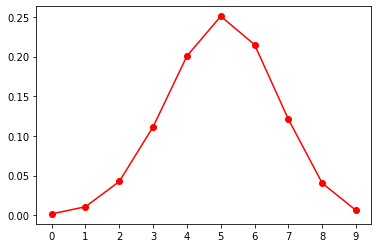

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.plot(df["prob"], "o-", c = "r")
plt.xticks(range(0,10))
plt.show()


When looking at a person's eye color, it turns out that 1% of the people in the world has green eyes. Considering the group of 20 people, find the probability that:

1. None has Green Eyes

2. Nine has Green Eyes

3. At most 3 have Green Eyes

4. At last 4 have Green Eyes

In [0]:
# None has Green Eyes
# Given k = 0, n = 20, p = 0.01 
stats.binom.pmf(k = 0, n = 20, p = 0.01)

0.8179069375972309

In [0]:
# Nine has Green Eyes
# k = 9, n = 20, p = 0.01
stats.binom.pmf(k = 9, n = 20, p = 0.01) # Probability is 0

1.5038101318529419e-13

In [0]:
# At Most 3 Green Eyes meaning Max 3 or Prob of green eyes less than equal to 3
# k = 0,1,2, n = 20, p = 0.01
stats.binom.cdf(k = 3, n = 20, p = 0.01) # We will apply cdf where we need value till a certain trial no.

0.9999573790723576

In [0]:
# At least 4 have Green eyes
1-stats.binom.cdf(k = 3, n = 20, p = 0.01)

4.262092764240055e-05

There are ten customers in a shop. The probability that an individual customer buys something is 0.4.

(A) Calculate the probability that one customer buys something.

(B) Calculate the probability that four customers buy something.

(C) Calculate the probability that at most two people buy something.

(D) What is the probability that at least two people buy something?

(E) How many customers do we expect to buy something?

In [0]:
# Probability that one customer buys something.
# n = 10, p = 0.4 k = 1
stats.binom.pmf(k = 1, n = 10, p = 0.4)

0.04031078400000004

In [0]:
# Probability that four customers buy something.
# n = 10, k = 4, p = 0.4
stats.binom.pmf(k = 4, n = 10, p = 0.4)

0.2508226560000002

In [0]:
# Probability that at most two people buy something.
stats.binom.cdf(k = 2, n = 10, p = 0.4)

0.16728975360000004

In [0]:
# Probability that at least two people buy something
1 - stats.binom.cdf(k = 1, n = 10, p = 0.4)

0.9536425984

In [0]:
# How many customers do we expect to buy something
# Here we need to find the expected value
10 * 0.4 # On an average 4 customers should be buying.

4.0

# Poisson Distribution

A Poisson Distribution is a measure of how many times an event occurs in X time interval. For e.g. A Library rents to 40 people on an average on a Sunday. How likely it is that 100 people will come to library for books.

Another example is on an average 200 customers visit ATMs on a Saturday. How likely it is that on this Saturday, we can have 250 customers or more.

#### Properties of Poisson Distribution

1. Poisson is based on time interval, space interval or volumne interval.
2. Example of Space Interval is No of Defects in 5 Foot Long Iron Rod where as Volume can be no of Defective Items Manufactured in a Machine.
3. The Occurence of the event is random in nature. It means that there is no prior intimation of the event happening. For e.g. Patients Visiting Doctor after appointment is not random event because it is planned. Similarly, landing of aircrafts, People visiting a Bday Party where as People Visiting a Career Fair qualifies as random.
4. Happening of One Occurence is Independent of the Other. 
5. The Average No of Occurences is given by Lambda or Mew.
6. The Actual No of Occurences in that interval is denoted by x.

### Formula of Poisson Distribution
P(x) = [lambda^x * (e^-lambda)]/factorial(x)

Note: value of e is 2.71828

Note: The Average No of Occurences aka Lambda is aka Poisson Parameter.

### Mean and Standard Deviation of Poisson Probability Distribution

1. Mean of Poisson Distribution is Lambda
2. SD = sqrt(Lambda)

### Examples of Poisson Distribution

1. Customers Calling Customer Care.
2. Visitors on a Website.
3. No of Network Failure in a Day
4. No of Bankruptcies filed in a Month.
5. No of People entering MacD

A Laptop Assembly unit is permorning a Defects Analysis, to understand the number of defects that could happen for a given defective laptop. It is noted from past quality & audit data that 12 defects are noticed on an average for a defective Laptop, calculate

1. Probability that a defective laptop has exactly 5 defects
2. Probability that a defective laptop has less than 5 defects

In [37]:
# mu = 12 x = 5 # Exactly 5 Defects
stats.poisson.pmf(k = 5, mu = 12)

0.012740638735861376

In [39]:
# Less than 5 defects
stats.poisson.cdf(k = 4, mu = 12) 

0.007600390681066992

The number of claims handled by an insurance agent follows a Poisson distribution with a mean of 5 per day.

i. What is the probability that there are less than 4 claims handled by the agent in a randomly selected day?

ii. What is the probability that among 20 randomly selected days, there are more than 17 days that have more than 3 claims?

In [40]:
# mu = 5, x = 3
stats.poisson.cdf(k = 3, mu = 5)

0.2650259152973616

In [43]:
# lets Find the Probability of Getting More than 3 Claims
1 - stats.poisson.cdf( k =2, mu = 5)

0.8753479805169189

In [46]:
1 - stats.binom.cdf( k = 17, n =20, p=0.875)

0.5353085627616241

The Global Birth Rate and Death Rate is 4.3 per second & 1.8 per second respectively as per the US Census Bureau.

If we assume that the global birth and death rates follow the Poisson probability distribution, we can find the probability of any given number of global births or deaths for a given time interval.

i) Find the probability of at most three global births during any given 1-second interval.
ii) Find the probability of exactly six global births using the Poisson formula.
iii) Find the probability of at most two global deaths


In [54]:
# most three global births during any given 1-second interval
stats.poisson.cdf(k = 3, mu = 4.3)

0.3771539277296392

In [55]:
# exactly six global births
stats.poisson.pmf(k = 6, mu = 4.3)

0.1191274827331984

In [56]:
# probability of at most two global deaths
stats.poisson.cdf(k = 2, mu = 1.8) 

0.7306210859394124

The number of misprints on a page of the Daily Mercury has a Poisson distribution with mean 1.2. Find the probability that the number of errors

1. on page four is 2;
2. on page three is less than 3
3. on all forty pages adds up to at least 3 - DONT TAKE THIS QUESTION.

In [71]:
# on page four is 2
stats.poisson.pmf(k = 2, mu = 1.2)

0.2168598325767855

In [72]:
# on page three is less than 3
stats.poisson.cdf(k = 2, mu = 1.2)

0.8794870987836302

In [75]:
# on all forty pages adds up to at least 3 
stats.poisson.cdf(k = 3, mu = 1.2)
1-stats.binom.cdf(k = 3, n = 40, p = 0.966)

1.0

Assuming that the weekly demand for the video recorder is a Poisson variable with mean 3, find the probability that the shop sells
(i) at least 3 in a week
(ii) at most 7 in a week

In [77]:
# at least 3 in a week
1 - stats.poisson.cdf(mu = 3, k = 2)

0.5768099188731564

In [79]:
# at most 7 in a week
stats.poisson.cdf(k = 7, mu = 3)

0.9880954961436426